In [5]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [6]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [7]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# for i in range(3, 19):
#     fixed[model.config.par_map[f'FFKs_decorrelated[{i}]']['slice']] = [True]

# for i in range(3, 8):
#     fixed[model.config.par_map[f'FFK_decorrelated[{i}]']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.404679
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def., try to make pos.def.
W MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -3.68165e-05
W MnPosDef Added to diagonal of Error matrix a value 0.500038
W MnPosDef Matrix forced pos-def by adding to diagonal 0.015902
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0138964
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0133658
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0136127
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0334138


{'cvl': array([9.40902693, 0.10234802]),
 'cvr': array([2.53495162, 0.11363363]),
 'csl': array([2.52096033, 0.20801371]),
 'csr': array([1.73859902, 0.20607018]),
 'ctl': array([4.97272005, 0.00640351]),
 'FFK_decorrelated[0]': array([0.02316893, 0.56201382]),
 'FFK_decorrelated[1]': array([-0.01886065,  0.67259072]),
 'FFK_decorrelated[2]': array([-0.00893412,  0.34277994]),
 'FFK_decorrelated[3]': array([0.00844808, 0.85747712]),
 'FFK_decorrelated[4]': array([-0.00528316,  0.84815161]),
 'FFK_decorrelated[5]': array([0.00073598, 0.49436303]),
 'FFK_decorrelated[6]': array([-0.002039  ,  0.76190282]),
 'FFK_decorrelated[7]': array([-0.0015112 ,  0.85014272]),
 'mu': array([1., 0.]),
 'stat': [[0.9996550721282129, 0.004190809291151509],
  [1.004922112250575, 0.003313805927789293],
  [0.9992711463346943, 0.0027131861278316127],
  [0.9956712198564738, 0.0026114605681244463],
  [0.9965726360182224, 0.002800137467325936],
  [1.0036233282004796, 0.003000075507505029],
  [1.001556994078538

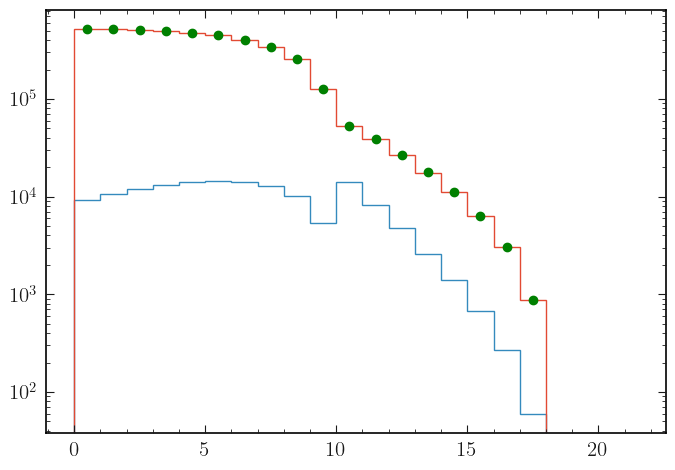

In [8]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')
plt.yscale('log')